In [1]:
import sys
import os


In [2]:
from classy import Class
import numpy as np


In [3]:
import classy
classy.__file__

'/home/r/rbond/alague/.local/lib/python3.7/site-packages/classy.cpython-37m-x86_64-linux-gnu.so'

In [4]:

lambda_settings = {# LambdaCDM parameters/theta

                       '100*theta_s': 1.040909,
                       'omega_b':0.022383,
    'A_s':2.75e-09,
    'Omega_Lambda':0.7,
        'Omega_m': 0.3138,#0.3139,
        #        'sigma8':0.773/np.sqrt((0.3144/0.3)),

        'n_s':0.96605,
        'tau_reio':0.0543,


        'l_max_scalars':5000,



    'z_max_pk':1,
    'output':'tCl,lCl,mPk'

    }
M=Class()
M.set(lambda_settings)

M.compute()
k=np.logspace(-4,np.log10(1),100)
pk_lcdm= np.array(  [M.pk(kk,0)for kk in k])

pk_lcdm_half= np.array( [M.pk(kk,1/2)for kk in k])
pk_lcdm_one= np.array(  [M.pk(kk,1)for kk in k])

In [ ]:
#Digitized from https://arxiv.org/pdf/2209.06217.pdf to check if we reproduce them

_z0=np.array([-3.928338299985809, -0.00303710798921528,
-3.392058086183245, -0.0022780379357646395,
-2.312343313939737, -0.003570609242703769,
-1.7453762830518889, -0.024991367484981812,
-1.480724658247007, -0.058675204578780574,
-1.234284092521639, -0.10111359443734921,
-0.8462939312236877, -0.15664159689702475,
-0.20707393216971592, -0.17491929189726127,
0.8126271226526676, -0.17403936663355565])
_z12=np.array([-4.001182536303864, -0.0030553190482947926,
-3.6637458019961207, -0.0014084598647178606,
-2.888593254812922, -0.0030896717279220616,
-2.3923418948961723, -0.0007781088879428785,
-1.8223593964334697, -0.0031356132633272027,
-1.615297289626791, -0.012458847736625533,
-1.2543280828721421, -0.030181105434936878,
-0.773686202166405, -0.05037344496476044,
-0.17059268719549614, -0.05272267158601772,
0.5843384891916195, -0.05253393879192095,
0.9749302303580727, -0.05181129085662933
])
_z1=np.array([-4.021463033915141, -0.0008728891726976148,
-3.4317321791779003, -0.002600456459013304,
-2.3792748687384693, 0.00016265786859654546,
-1.5108202071803598, -0.004620228466013926,
-0.9324417009602186, -0.016350633839458895,
0.5310652287025217, -0.01598475710704321,
0.9084125632656948, -0.015265420273402427
])

NameError: name '_z0' is not defined

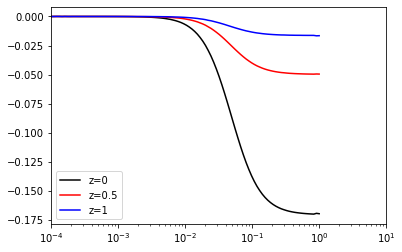

In [5]:
pks_Gamma0={}
for dw in [1e-4]:
    common_settings = {# LambdaCDM parameters/theta

                       '100*theta_s': 1.040909,
                       'omega_b':0.022383,
    'A_s':2.75e-09,
        'Omega_m': 0.3138,#0.3139,
        #        'sigma8':0.773/np.sqrt((0.3144/0.3)),

        'n_s':0.96605,
        'tau_reio':0.0543,


        'Omega_Lambda':0,

        'l_max_scalars':5000,
        'w0_fld':-1+dw,
        'fluid_equation_of_state': 'CLP',
        'gauge':'newtonian',       
        'use_ppf':False,



    'z_max_pk':1,
    'output':'tCl,lCl,mPk'

    }
    lcdm_settings = {# LambdaCDM parameters/theta

            'Gamma_DMDE':0,
    }
    M=Class()
    M.set(common_settings)
    M.set(lcdm_settings)

    M.compute()

    import numpy as np
    import matplotlib.pyplot as plt
    k=np.logspace(-4,np.log10(1),100)
    pk_lcdm= np.array(  [M.pk(kk,0)for kk in k])

    pk_lcdm_half= np.array( [M.pk(kk,1/2)for kk in k])
    pk_lcdm_one= np.array(  [M.pk(kk,1)for kk in k])
    pks_Gamma0[dw]=[pk_lcdm,pk_lcdm_half,pk_lcdm_one]
    for gamma in [1.17]:

        gamma_settings = {


            'Gamma_DMDE':gamma
        }

        M=Class()
        M.set(common_settings)
        M.set(gamma_settings)
        M.compute()

        pk_a=  np.array([M.pk(kk,0)for kk in k])
        plt.semilogx(k,np.array(pk_a-pk_lcdm)/np.array(pk_lcdm),label='z=0',color='black')
        pk_a=  np.array([M.pk(kk,1/2)for kk in k])
        plt.semilogx(k,np.array(pk_a-pk_lcdm_half)/np.array(pk_lcdm_half),label='z=0.5',color='red')
        pk_a= np.array( [M.pk(kk,1)for kk in k])
        plt.semilogx(k,np.array(pk_a-pk_lcdm_one)/np.array(pk_lcdm_one),label='z=1',color='blue')

    plt.xlim(1e-4,10)
    plt.legend()
plt.semilogx(10**_z0[::2],_z0[1::2],ls='--',color='gray')
plt.semilogx(10**_z12[::2],_z12[1::2],ls='--',color='pink')
plt.semilogx(10**_z1[::2],_z1[1::2],ls='--',color='lightblue')
